### K-means algorithm to create a photo filter

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [18]:
def display_image(image_array: np.ndarray,title:str|None = None):
    """
    Display image
    """
    image_array = image_array.astype(dtype="uint8")
    img = Image.fromarray(image_array,mode="RGB")
    plt.imshow(np.asarray(img))
    if title is not None:
        plt.title(title)
    plt.show()

In [19]:
def read_image(path: str):
    """
    Initially image is a 3d array with shape rows x cols X 3
    Each pixel has RGB values.  
    Return a 2D flattened array.
    """
    image = Image.open(path)
    image_array = np.array(image,dtype="int32")
    display_image(image_array,"Orignal Image")
    orignal_shape = image_array.shape
    print(f"Original Shape of image: {image_array.shape}")
    image.close()
    image_array = image_array.reshape((image_array.shape[0] * image_array.shape[1], image_array.shape[2]))
    print(f"Flattened Shape of image: {image_array.shape}")
    return image_array, orignal_shape


### K-means algorithm using Lloyds algorithm

1. Given k centres, assign each point to nearest centre.  
2. Recompute k centres, by computing the mean of the points belonging to that cluster. 
3. Our objective is to find the "best" clustering, which is the one that has a minimum WCSS(within-cluster-sum-of-squares)

In [20]:
def starting_centres(X:np.ndarray, k:int):
    """
    Randomly assign starting k centres
    """
    random_rows = np.random.randint(0,X.shape[0],size=k)
    return X[random_rows,:]

In [21]:
def compute_distances(X:np.ndarray,centres:np.ndarray) -> np.ndarray:
    """
    Compute distances between every pixel and all the centres using the 2-norm. 
    Use the brodcasting rule to create new axis in X.  
    Returns an array which gives the squared distance (2-norm) 
    between a pixel and all the centres.
    """
    return np.linalg.norm(
        X[:,np.newaxis,:] - centres,
        ord=2,
        axis=2
	) ** 2

In [22]:
def assign_cluster_label(distances: np.ndarray) -> np.ndarray:
    """
    Find out the cluster a pixel belongs to.
    """
    return np.argmin(distances,axis=1)

In [23]:
def update_centres(X: np.ndarray, labels: np.ndarray) -> np.ndarray:
    """
    Find the mean of all points having the same label and assign it as 
    the new centre of the cluster
    """
    points, columns = X.shape
    num_of_clusters = np.max(labels) + 1
    centres = np.zeros(shape=(num_of_clusters,columns))
    
    for cluster in range(num_of_clusters):
        centres[cluster,:columns] = np.mean(X[labels == cluster, :],axis=0)
    return centres

In [24]:
def within_cluster_sum_of_squares(distances: np.ndarray) -> float:
    return np.sum(np.amin(distances,axis=1))

In [25]:
def has_converged(old_centers: np.ndarray, centers: np.ndarray) -> bool:
    """
    Checks whether the centres have moved, when two sets of centres are given.
    """
    return set([tuple(x) for x in old_centers]) == set([tuple(x) for x in centers])

In [26]:
def k_means(
        X:np.ndarray,
        k: int,
        max_steps = np.inf
):
    """
    Clusters points of X matrix into k clusters
    """
    centres = starting_centres(X,k)

    converged = False
    step = 1

    labels = np.zeros(shape=X.shape)
    print("Starting k-means algorithm...")
    while converged is False and step <= max_steps:
        old_centres = centres
        distances = compute_distances(X,centres)
        labels = assign_cluster_label(distances)
        centres = update_centres(X,labels)
        converged = has_converged(old_centres,centres)
        print(f"Step Number {step} - WCSS {within_cluster_sum_of_squares(distances)}")
        step += 1
    return labels, centres

In [27]:
def create_photo_filter(
        path:str,
        num_of_clusters:int
):
    image_array, orignal_shape = read_image(path)
    labels, centres = k_means(image_array,num_of_clusters)
    image_with_filter_flat = np.array([centres[label] for label in labels])
    image_with_filter = np.reshape(image_with_filter_flat,shape=orignal_shape,order="C")
    print(f"Shape of filtered applied image: {image_with_filter.shape}")
    display_image(image_with_filter,"Image with filter applied")



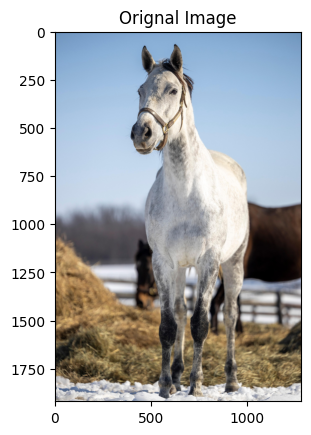

Original Shape of image: (1920, 1280, 3)
Flattened Shape of image: (2457600, 3)
Starting k-means algorithm...
Step Number 1 - WCSS 21878473029.0
Step Number 2 - WCSS 5977066259.914948
Step Number 3 - WCSS 4936596319.12553
Step Number 4 - WCSS 4508484067.3272505
Step Number 5 - WCSS 4238497038.4374943
Step Number 6 - WCSS 4119686239.078593
Step Number 7 - WCSS 4051429291.1566486
Step Number 8 - WCSS 3997095854.3260484
Step Number 9 - WCSS 3920921492.248433
Step Number 10 - WCSS 3834668826.7807255
Step Number 11 - WCSS 3770265258.213849
Step Number 12 - WCSS 3730675642.701341
Step Number 13 - WCSS 3705273321.3327684
Step Number 14 - WCSS 3686858203.24972
Step Number 15 - WCSS 3673797615.834638
Step Number 16 - WCSS 3663477474.6557827
Step Number 17 - WCSS 3656564447.1973104
Step Number 18 - WCSS 3651917448.2528896
Step Number 19 - WCSS 3649077877.8339214
Step Number 20 - WCSS 3646833250.1119056
Step Number 21 - WCSS 3645649605.7976856
Step Number 22 - WCSS 3645002493.289825
Step Number 2

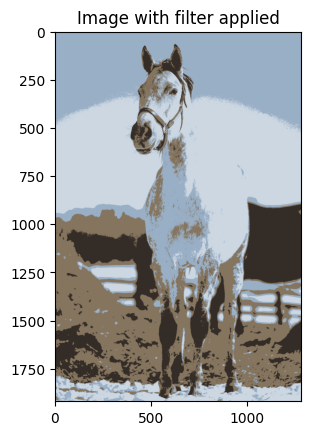

In [28]:
create_photo_filter("images/horse-9338907_1920.jpg",4)

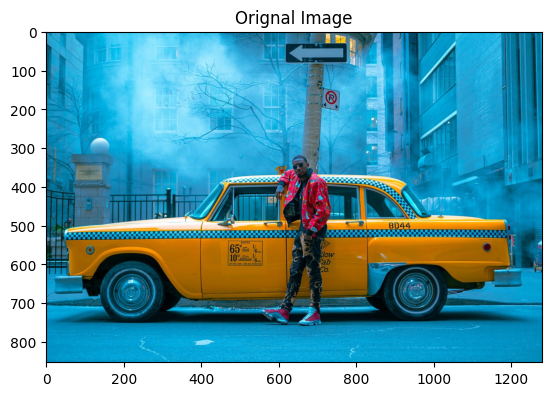

Original Shape of image: (853, 1280, 3)
Flattened Shape of image: (1091840, 3)
Starting k-means algorithm...
Step Number 1 - WCSS 6496876938.0
Step Number 2 - WCSS 2436634593.424415
Step Number 3 - WCSS 1728418442.6078336
Step Number 4 - WCSS 1613249949.1898043
Step Number 5 - WCSS 1572867873.5953183
Step Number 6 - WCSS 1547550730.3241248
Step Number 7 - WCSS 1524622072.1475995
Step Number 8 - WCSS 1503611615.4466126
Step Number 9 - WCSS 1485389895.8514564
Step Number 10 - WCSS 1470622736.3496034
Step Number 11 - WCSS 1457879656.2780626
Step Number 12 - WCSS 1444655291.1742127
Step Number 13 - WCSS 1429062469.140674
Step Number 14 - WCSS 1414403127.4735746
Step Number 15 - WCSS 1401208349.802231
Step Number 16 - WCSS 1386147864.2910259
Step Number 17 - WCSS 1365659414.0825245
Step Number 18 - WCSS 1342447113.6573088
Step Number 19 - WCSS 1321811952.9375741
Step Number 20 - WCSS 1304235947.9391468
Step Number 21 - WCSS 1289354250.5541632
Step Number 22 - WCSS 1278308808.5383446
Step Nu

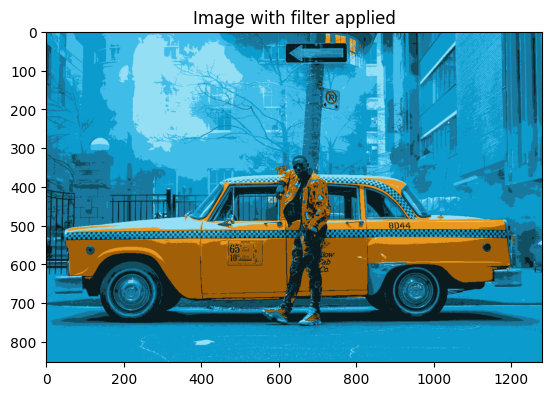

In [29]:
create_photo_filter("images/man-8493246_1280.jpg",8)

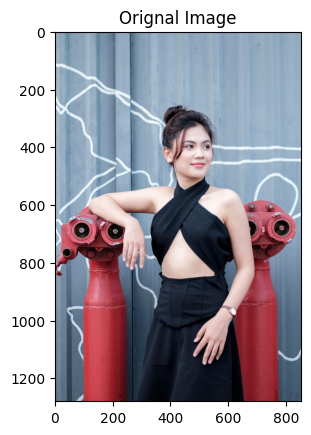

Original Shape of image: (1280, 853, 3)
Flattened Shape of image: (1091840, 3)
Starting k-means algorithm...
Step Number 1 - WCSS 10908322826.0
Step Number 2 - WCSS 3513320550.803701
Step Number 3 - WCSS 2712585088.734814
Step Number 4 - WCSS 2343857832.9499426
Step Number 5 - WCSS 2086002402.118986
Step Number 6 - WCSS 1941724512.418353
Step Number 7 - WCSS 1922312654.1661747
Step Number 8 - WCSS 1920366950.5481486
Step Number 9 - WCSS 1920116234.0358956
Step Number 10 - WCSS 1920079429.172423
Step Number 11 - WCSS 1920072659.6974905
Step Number 12 - WCSS 1920072199.3527265
Step Number 13 - WCSS 1920072168.6865206
Step Number 14 - WCSS 1920072164.0265114
Step Number 15 - WCSS 1920072163.747466
Shape of filtered applied image: (1280, 853, 3)


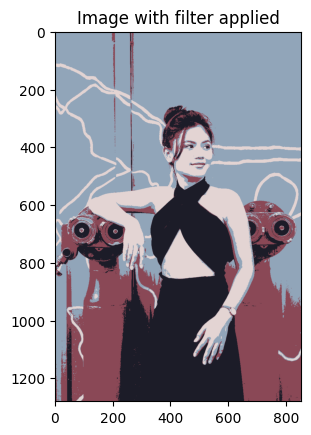

In [30]:
create_photo_filter("images/woman-8086721_1280.jpg",4)